In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

In [192]:
phi = 0.
psi = 0.
theta = np.pi/4
theta_prima = 0.
g = 0.81
d = 0.3
m = 0.1
r = 0.1


t=np.linspace(0,8,100)
r0 = np.array([phi, psi, theta, theta_prima])

I_0 = (0.25 * m * r**2) + (m*d**2)
I_z =(0.5 * m * r**2)

p_phi = I_z * 400 * np.cos(theta)
p_psi = I_z * 400

In [209]:
def System(r, t, p_phi, p_psi, dpsidt_val=400):
    
    phi, psi, theta, theta_prima = r
    
    dphidt = (p_phi - I_z * dpsidt_val * np.cos(theta)) / (I_0 * np.sin(theta)**2 + I_z * np.cos(theta)**2)
    dpsidt = (p_psi / I_z) - (dphidt * np.cos(theta)) 
    dthetadt = theta_prima
    dtheta_primadt = ((dpsidt**2 * (np.sin(theta) * np.cos(theta)) * (I_0 - I_z)) - (dpsidt * dphidt * I_z * np.sin(theta)) + m * g * d * np.sin(theta)) / I_0
    
    return np.array([dphidt, dpsidt, dthetadt, dtheta_primadt])

In [210]:
sol = odeint(System, r0, t, args = (p_phi,p_psi,400,))

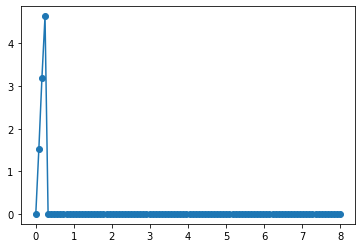

In [211]:
#plt.scatter(t,sol[:,2],marker='.')
#plt.plot(t,sol[:,2])
plt.scatter(t,sol[:,0])
plt.plot(t,sol[:,0])
plt.savefig("figura1.pdf")

In [196]:
xs = np.cos(sol[:,0])
ys = np.sin(sol[:,0])

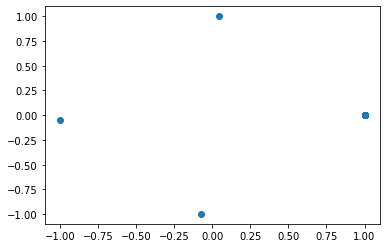

In [197]:
plt.scatter(xs,ys)
plt.show()